In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True
import os

In [4]:
inlet_x=-0.5
outlet_x=1.1

# Load data

In [5]:
cd ~/HPT_500k/HPT_LS20_DOM80_TI20/convergence/

/mnt/drive2/re_500k/HPT_LS20_DOM80_TI20/convergence


In [6]:
cases=[]
labels=[]
convergencedir='./'
# now find all the stat-files and set the labels
dt=2.3*1.0e-05
root, dirs, files=next(os.walk(convergencedir))
for d in dirs:
#                self.filelist.append(os.getcwd()+'/'+convergencedir+'/'+d+'/STAT_cont.bin')
    cases.append(convergencedir+'/'+d+'/')
    temp=d.split('_')
    labels.append('%.2f - %.2f'%(float(temp[0])*dt,float(temp[2])*dt))
n_c=len(cases)
print cases
print labels

['.//5103101_to_5265101/', './/5015101_to_5055101/', './/5193101_to_5265101/']
['117.37 - 121.10', '115.35 - 116.27', '119.44 - 121.10']


In [7]:
cascades=[]
for i in range(n_c):
    filen=cases[i]+'/STAT_cont.bin'
    cascades.append(l.cascade_mean(inlet_x,outlet_x,filename=filen,infile='../cascade3d.in',Refplane='Outlet',chord=1.74
                                  ,HeatTransfer=True,label=labels[i].replace('_',' ')))

reading inlet and outlet
reading data from file previously extracted
reading data from file previously extracted
198
reading blade
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
3 i= 224
extract line from (i,j) 224 1  to  224 224  in block  3 224
reading data from file previously extracted
5 i= 224
extract line from (i,j) 224 1  to  224 672  in block  5 672
reading data from file previously extracted
7 i= 224
extract line from (i,j) 224 1  to  224 384  in block  7 384
reading data from file previously extracted
finished reading blade
len=1.57321798801
len=1.57321802527
dTdn [ -97.26633426  -89.45833981  -87.94910852  -92.42607756 -100.91035161]
mu [  1.13555898e-05   1.13555898e-05   1.13555898e-05   1.13555898e-05
   1.13555898e-05]
extract line from (i,j) 1 1  to  1 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 223 1  to  223 672  in block  4 672
reading data from file previously extra

/home/rp3e11/codes/PLATUS/platus/lines.py:1383: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:1386: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:1388: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:1390: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.dist!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:2701: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.blade.dist!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:1523: FutureWarning: comparison to `None` will result in an elementwise object comparison in the futur

extract line from (i,j) 222 1  to  222 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 1 1  to  1 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 223 1  to  223 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 222 1  to  222 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 1 1  to  1 672  in block  5 672
reading data from file previously extracted
extract line from (i,j) 223 1  to  223 672  in block  5 672
reading data from file previously extracted
extract line from (i,j) 222 1  to  222 672  in block  5 672
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 672  in block  5 672
reading data

In [13]:
cascades[-1].report_integral_mixed_out()

Isentropic Reynolds Number:    535446.59188
Isentropic Mach Number:    0.9169649765
Isentropic Reynolds Number:    545378.38197 (inlet mass averaged)
Isentropic Mach Number:    0.9169730134 (inlet mass averaged)
Isentropic exit Velocity:    5.6135037913
Mixed out loss    0.0447488894
Inlet angle:   -0.1591016866
Inlet Mach number:    0.1487661381
Inlet stagnation pressure:   32.9828277216
Inlet stagnation Temperature:    1.8205755487
Inlet static pressure:   32.4769070424
Inlet static Temperature:    1.8125526960
Outlet angle:  -74.9329518064
Outlet Mach number:    0.8995991248
Outlet stagnation pressure:   32.3635370008
Outlet stagnation Temperature:    1.8095983133
Outlet static pressure:   19.1435854773
Outlet static Temperature:    1.5575069148
Outlet density:    0.6883056355


# Plot cascae quantities

## Inlet profiles

<IPython.core.display.Javascript object>


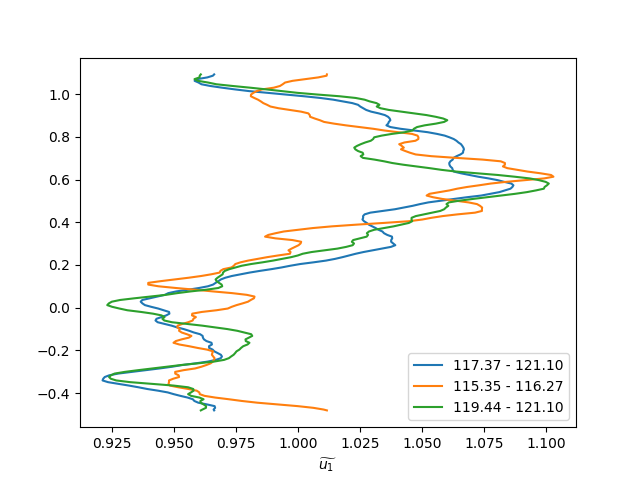

<IPython.core.display.Javascript object>


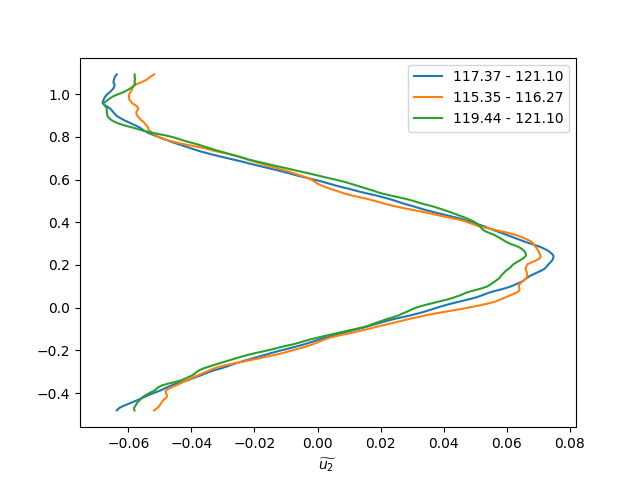

<IPython.core.display.Javascript object>


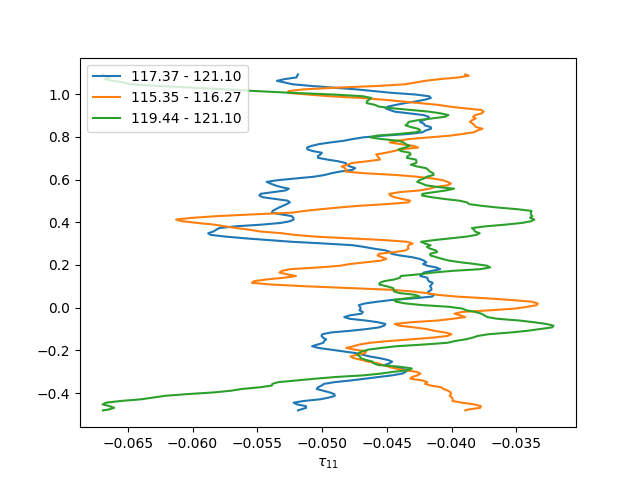

<IPython.core.display.Javascript object>


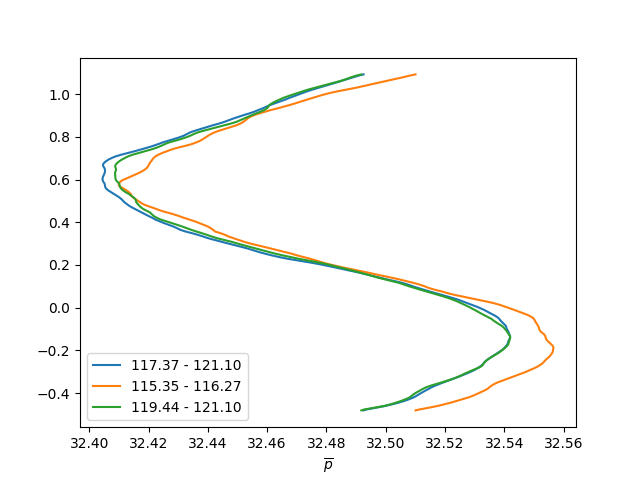

In [10]:
ids=[]
ids.append(cascades[0].header.get_index(101,2))
ids.append(cascades[0].header.get_index(101,3))
ids.append(cascades[0].header.get_index(101,10))
ids.append(cascades[0].header.get_index(101,5))
for i,val in enumerate(ids):
    plt.figure()
    for j in range(n_c):
        plt.plot(cascades[j].inlet.data[:,val],cascades[j].inlet.data[:,1],label=cascades[j].label)
    plt.legend()
    plt.xlabel(cascades[j].header.vars[val])

In [11]:
inlet_stream=l.lines(convergence=True,convergencedir='./')

In [12]:
inlet_stream.extr_line([-1.0,0.0],[-0.2,0.0],300)

written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 300 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 300 points.
written out file is older than STAT file, interpolate from STAT file
Extracting line
Found 300 points.


<IPython.core.display.Javascript object>


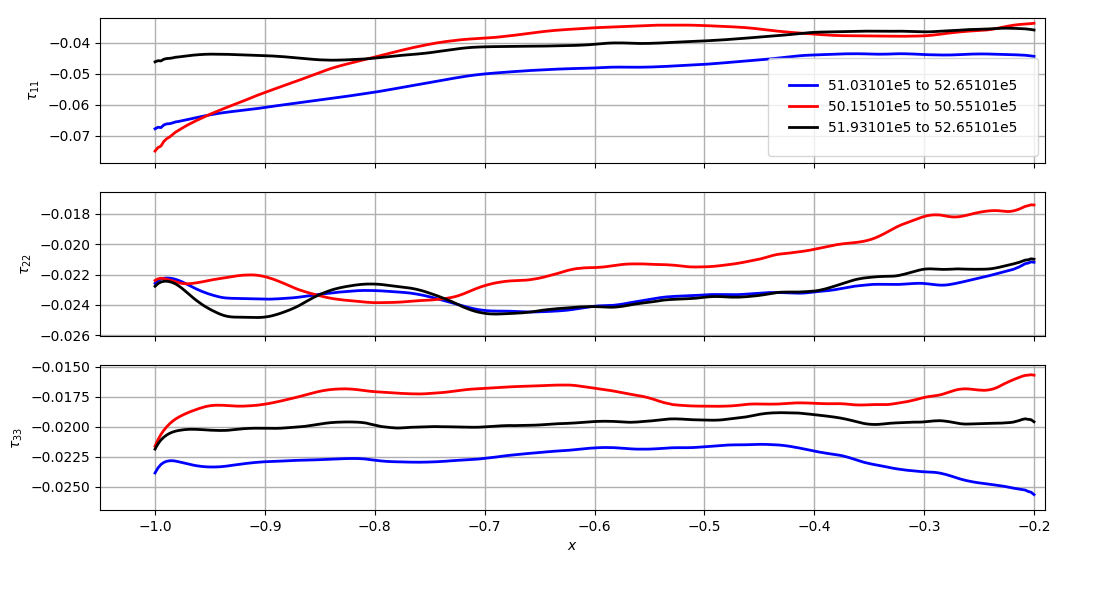

<IPython.core.display.Javascript object>


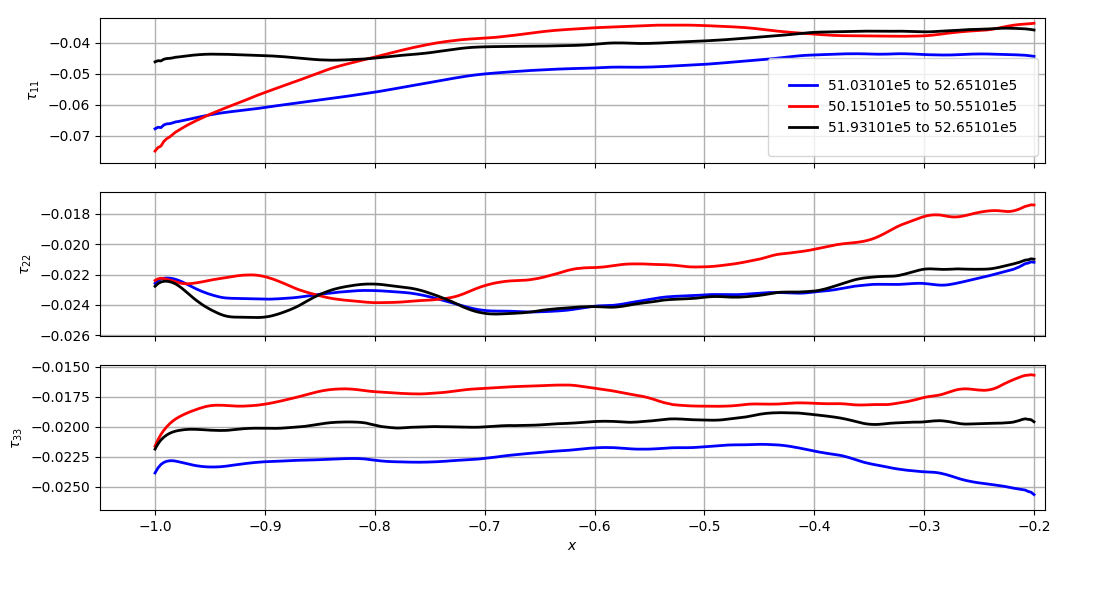

In [13]:
pl_var=[]
pl_var.append(inlet_stream.l[0].var.get_index(101,10))
pl_var.append(inlet_stream.l[0].var.get_index(101,12))
pl_var.append(inlet_stream.l[0].var.get_index(101,13))
inlet_stream.plot_var([0],pl_var)

# Blade Profiles

<IPython.core.display.Javascript object>


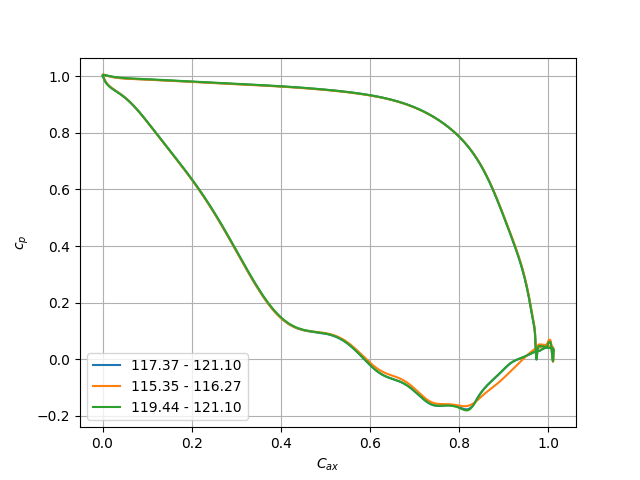

In [14]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.data[:,0],cascades[i].cp,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$C_{ax}$')
plt.ylabel('$c_p$')

<IPython.core.display.Javascript object>


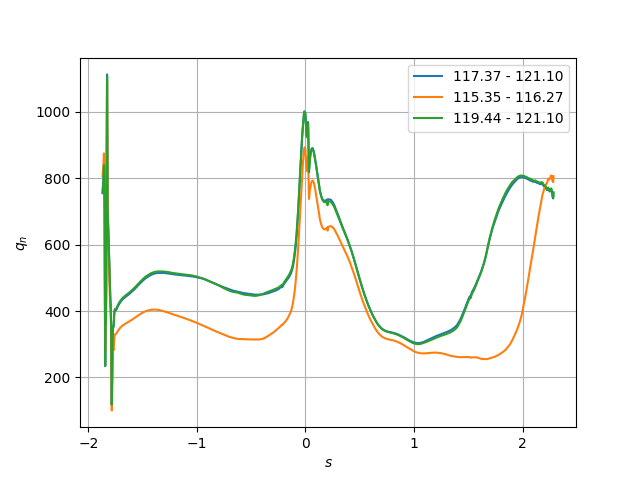

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


In [15]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:]-0.05,cascades[i].qnorm,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$s$')
plt.ylabel('$q_{n}$')
tikz_save('qn_convergence.tikz',figureheight='\\fh',figurewidth='\\fw')

## Outlet region

<IPython.core.display.Javascript object>


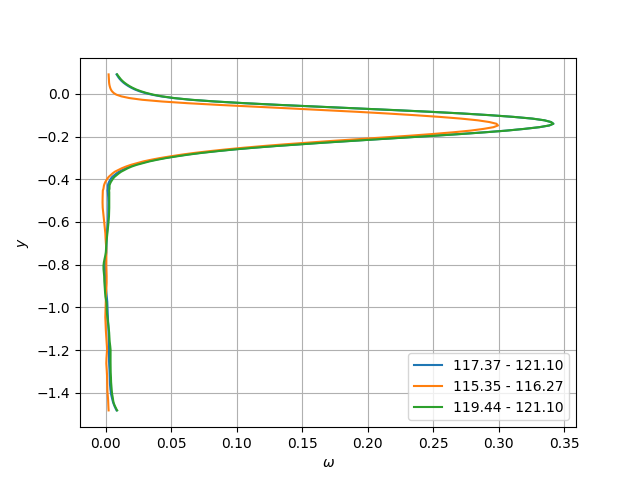

In [16]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].loss_mix[:],cascades[i].outlet.data[:,1],label=cascades[i].label)
plt.grid()
plt.legend(loc=0)
plt.xlabel('$\omega$')
plt.ylabel('$y$')

In [8]:
for case_i in cascades:
    case_i.extr_bl_quantities(nps_stream=100,nps_wall_norm=200,extent=0.05,f_ss_start=0.05,f_ss_end=0.95
                           ,f_ps_start=0.02,f_ps_end=0.98)

<IPython.core.display.Javascript object>


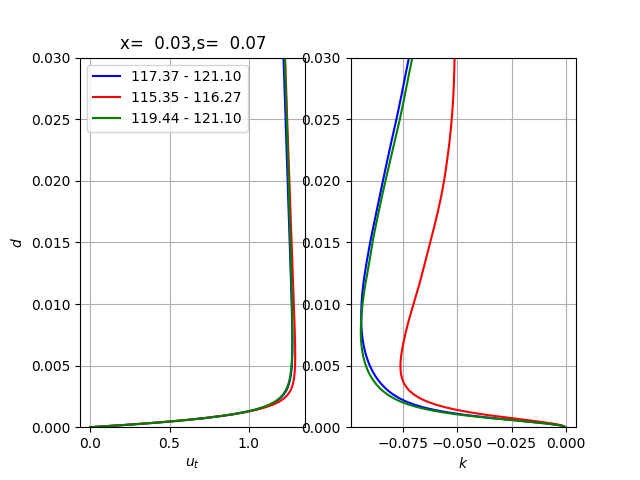

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


<IPython.core.display.Javascript object>


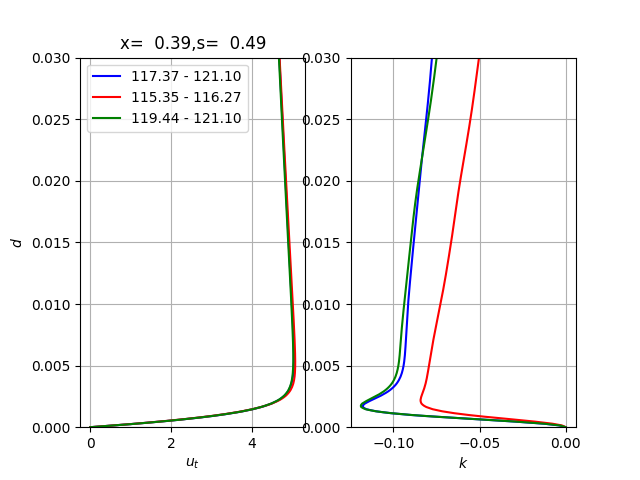

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


<IPython.core.display.Javascript object>


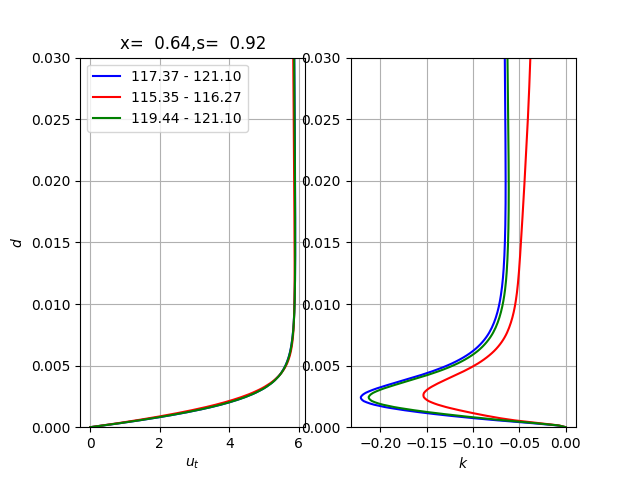

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


<IPython.core.display.Javascript object>


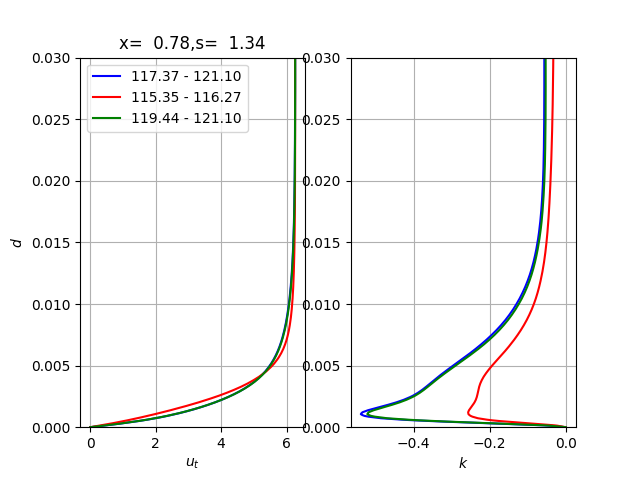

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


<IPython.core.display.Javascript object>


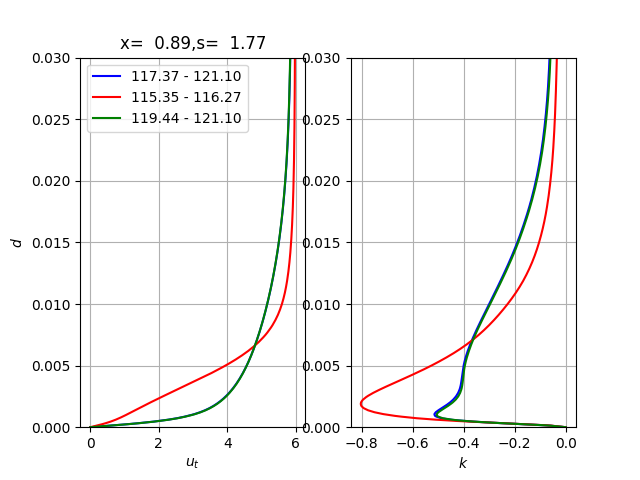

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


In [14]:
colors=['b','r','g','k','brown','m']
for j in range(0,100,20):
    plt.figure()
    plt.subplot(1,2,1)
    j_w=5
    plt.title('x=%6.2f,s=%6.2f'%(cascades[0].bl_ss_wall_norm[0,0,j],cascades[0].bl_ss_wall_norm[2,0,j]-0.05))
    for ic in range(3):
        plt.plot(cascades[ic].bl_ss_wall_norm[3,:,j],cascades[ic].bl_ss_wall_norm[1,:,j],label=labels[ic],color=colors[ic])
    plt.grid()
    plt.ylim([0,0.03])
    plt.legend(loc=0)
    plt.xlabel('$u_t$')
    plt.ylabel('$d$')
    plt.subplot(1,2,1)
    j_w=5
    plt.subplot(1,2,2)    
    for ic in range(3):
        plt.plot(-cascades[ic].bl_ss_wall_norm[12,:,j],cascades[ic].bl_ss_wall_norm[1,:,j],label=labels[ic],color=colors[ic])
    plt.grid()
    plt.ylim([0,0.03])
    plt.xlabel('$k$')
    plt.savefig('vel_k_prof_conv_%i.png'%j)
    tikz_save('vel_k_prof_conv_%i.tikz'%j,figureheight='\\figureheight',figurewidth='\\figurewidth')
# for j in range(0,100,20):
#     plt.figure()
#     plt.subplot(2,1,1)
#     j_w=5
#     plt.title('x=%6.2f,s=%6.2f'%(cascades[0].bl_ss_wall_norm[0,0,j],cascades[0].bl_ss_wall_norm[2,0,j]-0.05))
#     for ic in range(3):
#         plt.loglog(cascades[ic].bl_ss_wall_norm[13,1:,j],cascades[ic].bl_ss_wall_norm[14,1:,j],label=labels[ic],color=colors[ic])
#     plt.grid()
#     #plt.ylim([0,100])
#     plt.legend(loc=0)
#     plt.ylabel('$u_t^{+}$')
#     j_w=5
#     plt.subplot(2,1,2)    
#     for ic in range(3):
#         plt.loglog(-cascades[ic].bl_ss_wall_norm[13,1:,j],cascades[ic].bl_ss_wall_norm[16,1:,j],label=labels[ic],color=colors[ic])
#     plt.grid()
#     #plt.ylim([0,0.03])
#     plt.xlabel('$y^{+}$')
#     plt.ylabel('$k^{+}$')
#     tikz_save('vel_k_prof_scaled_%i.tikz'%j,figureheight='\\figureheight',figurewidth='\\figurewidth')   